In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import os
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from PyPDF2 import PdfReader

In [33]:
# Paths to folders
jd_folder = "C:\\library\\Projects\\I_P_project\\Resume Scanning by NLP\\jds"
resume_folder = "C:\\library\Projects\\I_P_project\\Resume Scanning by NLP\\resumes"


In [34]:
# Load Job Descriptions
jds = []
for file in os.listdir(jd_folder):
    with open(os.path.join(jd_folder, file), "r", encoding="utf-8") as f:
        jds.append(f.read())

In [35]:
job_description

'Job Title: Data Scientist\nResponsibilities: Analyze complex datasets, develop predictive models, and provide insights.\nRequirements: Proficiency in Python, SQL, and Machine Learning. Strong analytical and problem-solving skills.'

In [36]:
# Load all resumes
resumes = {}
for file in os.listdir(resume_folder):
    with open(os.path.join(resume_folder, file), "r", encoding="utf-8") as f:
        resumes[file] = f.read()

In [48]:
print(" Job Description loaded:", len(jds))
print(" Resumes loaded:", len(resumes))

 Job Description loaded: 5
 Resumes loaded: 10


In [38]:
print("----Sample JD----")
print(job_description[:300])   # print first 300 characters

print("\n----Sample Resume----")
first_resume = list(resumes.keys())[0]
print(resumes[first_resume][:300])

----Sample JD----
Job Title: Data Scientist
Responsibilities: Analyze complex datasets, develop predictive models, and provide insights.
Requirements: Proficiency in Python, SQL, and Machine Learning. Strong analytical and problem-solving skills.

----Sample Resume----
Name: Candidate 1
Experience: 2 years
Skills: Python, SQL, Machine Learning, Pandas, NumPy, Scikit-learn, Data Visualization, Communication
Projects: Built predictive models, performed data cleaning, and delivered insights from large datasets.


In [40]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text


In [41]:
# Clean job description
job_description_clean = clean_text(job_description)

In [42]:
# Clean all resumes
resumes_clean = {}  # create empty dictionary

for name, text in resumes.items():
    cleaned_text = clean_text(text)  # clean each resume
    resumes_clean[name] = cleaned_text  # add to new dictionary

In [51]:
print(" Cleaned JD :\n", job_description_clean[:200])
first_resume = list(resumes_clean.keys())[0]
print("\n Cleaned Resume Sample : \n", resumes_clean[first_resume][:200])

 Cleaned JD :
 job title data scientist responsibilities analyze complex datasets develop predictive models and provide insights requirements proficiency in python sql and machine learning strong analytical and prob

 Cleaned Resume Sample : 
 name candidate experience years skills python sql machine learning pandas numpy scikitlearn data visualization communication projects built predictive models performed data cleaning and delivered insi


In [52]:
# Its Store all cleaned job description and  resumes cleaned value in to document in the form of list
documents = [job_description_clean] + list(resumes_clean.values())

In [53]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [54]:
# Fit and transform all documents
tfidf_matrix = vectorizer.fit_transform(documents)

In [55]:
# Compare JD (first doc) with every resume (other docs)
cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

In [56]:
cosine_similarities

array([0.19181473, 0.19181473, 0.19181473, 0.19181473, 0.19181473,
       0.19181473, 0.19181473, 0.19181473, 0.19181473, 0.19181473])

In [57]:
ranked_resumes = sorted(
    zip(resumes_clean.keys(), cosine_similarities), # we use this to combine resume_clean key + consine_similirites (resume1 + 0.19181)
    key=lambda x: x[1],
    reverse=True # we do reverse because we are performing highest simillirity first
)

In [58]:
df = pd.DataFrame(ranked_resumes, columns=['Resume', 'Similarity_Score'])
print(df)

         Resume  Similarity_Score
0   Resume1.txt          0.191815
1  Resume10.txt          0.191815
2   Resume2.txt          0.191815
3   Resume3.txt          0.191815
4   Resume4.txt          0.191815
5   Resume5.txt          0.191815
6   Resume6.txt          0.191815
7   Resume7.txt          0.191815
8   Resume8.txt          0.191815
9   Resume9.txt          0.191815


In [59]:
top_resumes = df.head(5)
print(top_resumes)


         Resume  Similarity_Score
0   Resume1.txt          0.191815
1  Resume10.txt          0.191815
2   Resume2.txt          0.191815
3   Resume3.txt          0.191815
4   Resume4.txt          0.191815


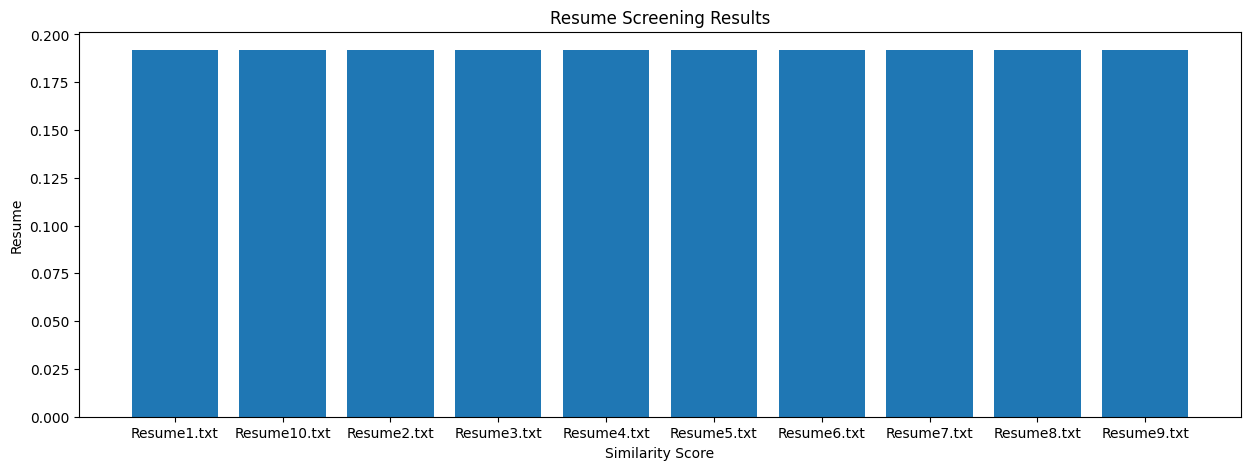

In [65]:
#Visulizing using bar graph to check how much data similar_score

plt.figure(figsize=(15,5))
plt.bar(df['Resume'], df['Similarity_Score'])
plt.xlabel('Similarity Score')
plt.ylabel('Resume')
plt.title('Resume Screening Results')
plt.show()


In [66]:
# To save the result to a file
df.to_csv('ranked_resumes.csv', index=False)

In [68]:
# Function which cleaned the Text 
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text


In [71]:
# EXTRACT TEXT FROM PDF 
def extract_text_from_pdf(file):
    reader = PdfReader(file)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text

In [73]:
# Load resumes (supports both .txt and .pdf)
resumes = {}

for file in os.listdir(resume_folder):
    file_path = os.path.join(resume_folder, file)
    
    if file.endswith(".pdf"):
        with open(file_path, "rb") as f:
            text = extract_text_from_pdf(f)
    elif file.endswith(".txt"):
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
    else:
        continue  # skip other files

    resumes[file] = text
